In [1]:
from __future__ import print_function

"""
A reference implementation of cavity quantum electrodynamics 
configuration interactions singles.
"""

__authors__   = ["Jon McTague", "Jonathan Foley"]
__credits__   = ["Jon McTague", "Jonathan Foley"]

__copyright_amp__ = "(c) 2014-2018, The Psi4NumPy Developers"
__license__   = "BSD-3-Clause"
__date__      = "2021-01-15"

# ==> Import Psi4, NumPy, & SciPy <==
import psi4
import numpy as np
import scipy.linalg as la
import time
from helper_cqed_rhf import *
from helper_cis import *
from helper_cqed_cis import *
from helper_transformed_cqed_cis import *

# Set Psi4 & NumPy Memory Options
psi4.set_memory('2 GB')
#psi4.core.set_output_file('output.dat', False)

numpy_memory = 2


In [2]:
# template for the z-matrix for MgH+
mol_tmpl = """Mg
H 1 **R**
symmetry c1
1 1"""

# options dict
options_dict = {'basis': 'sto-3g',
               'save_jk': True}

psi4.set_options(options_dict)


In [8]:
# array of bondlengths for MgH+
r_array = np.array([1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3])

# lambda arrays
l_big = np.array([0., 0., 0.1])
l_med = np.array([0.0, 0.0, 0.01])

tdm_array = np.zeros((3, len(r_array)))
dipole_array = np.zeros((3,2,len(r_array)))

# array for ordinary cis
cis_energy_array = np.zeros((5,len(r_array)))
# array for cqed cis
cqed_cis_energy_array = np.zeros((5,len(r_array)))

om = 7.0 / 27.211

E_au = 0.03

# term for the dipole self energy
l = E_au / np.sqrt(om/2)
lam = np.array([0,0,l])
# loop over the different bond-lengths, create different instances
# of HF molecule
ctr = 0
for r in r_array:
    molstr = mol_tmpl.replace("**R**", str(r))
    mol = psi4.geometry(molstr)
    e, wfn = psi4.energy("scf/sto-3g", return_wfn=True, molecule=mol)
    cis_e, cis_mu, tdm = cis(molstr, options_dict)
    
    cis_energy_array[0,ctr] = e
    cis_energy_array[1:5,ctr] = e+cis_e[0:4]
    
    scf_e, cqed_cis_e, cqed_cis_c = transformed_cqed_cis(lam, molstr, options_dict, om)
    #scf_e, cqed_cis_e, cqed_cis_c = cqed_cis(lam, molstr, options_dict, om)
    cqed_cis_energy_array[0,ctr] = scf_e+om
    cqed_cis_energy_array[1:5,ctr] = scf_e+cqed_cis_e[0:4]
    dipole_array[:,0,ctr] = cis_mu[:,0]
    dipole_array[:,1,ctr] = cis_mu[:,1]
    tdm_array[:,ctr] = tdm
    ctr+=1
    


Number of occupied orbitals: 6
Nuclear energy 4.884712713876925
scf energy is -197.48995010821469
-197.48995010821469

Start SCF iterations:

Canonical RHF One-electron energy = -282.9899588527267724
CQED-RHF One-electron energy = -282.9985407881717379
Nuclear repulsion energy = 4.8847127138769251
Dipole energy = 0.0234019934163114
SCF Iteration   1: Energy = -197.4775387113515137   dE = -1.97478E+02   dRMS = 9.41294E-04
SCF Iteration   2: Energy = -197.4777136339382650   dE = -1.74923E-04   dRMS = 3.05528E-04
SCF Iteration   3: Energy = -197.4777313979025735   dE = -1.77640E-05   dRMS = 1.01786E-04
SCF Iteration   4: Energy = -197.4777332975598654   dE = -1.89966E-06   dRMS = 3.37942E-05
SCF Iteration   5: Energy = -197.4777335032050303   dE = -2.05645E-07   dRMS = 1.11951E-05
Performed QED-RHF on the following molecule
Mg
H 1 1.3
symmetry c1
1 1
Total time for SCF iterations: 0.003 seconds 

QED-RHF   energy: -197.47773350 hartree
Psi4  SCF energy: -197.48995011 hartree

Number of o


Number of occupied orbitals: 6
Nuclear energy 2.8864211491090908
scf energy is -197.4078774011297
-197.4078774011297

Start SCF iterations:

Canonical RHF One-electron energy = -279.0559714357117969
CQED-RHF One-electron energy = -279.0562598713435136
Nuclear repulsion energy = 2.8864211491090908
Dipole energy = 0.0380492822065700
SCF Iteration   1: Energy = -197.3790746075442541   dE = -1.97379E+02   dRMS = 1.82239E-03
SCF Iteration   2: Energy = -197.3799076970349233   dE = -8.33089E-04   dRMS = 6.55753E-04
SCF Iteration   3: Energy = -197.3799765705954599   dE = -6.88736E-05   dRMS = 1.82564E-04
SCF Iteration   4: Energy = -197.3799831418393751   dE = -6.57124E-06   dRMS = 5.95626E-05
SCF Iteration   5: Energy = -197.3799837874672960   dE = -6.45628E-07   dRMS = 1.82931E-05
Performed QED-RHF on the following molecule
Mg
H 1 2.2
symmetry c1
1 1
Total time for SCF iterations: 0.003 seconds 

QED-RHF   energy: -197.37998379 hartree
Psi4  SCF energy: -197.40787740 hartree

Number of oc

-197.27552321686318

Start SCF iterations:

Canonical RHF One-electron energy = -277.7750756928924147
CQED-RHF One-electron energy = -277.7339056248223415
Nuclear repulsion energy = 2.1167088426800000
Dipole energy = 0.0393720956789458
SCF Iteration   1: Energy = -197.2157911327360864   dE = -1.97216E+02   dRMS = 2.57373E-03
SCF Iteration   2: Energy = -197.2173393333428351   dE = -1.54820E-03   dRMS = 1.00342E-03
SCF Iteration   3: Energy = -197.2174883522127971   dE = -1.49019E-04   dRMS = 3.68511E-04
SCF Iteration   4: Energy = -197.2175079349630096   dE = -1.95828E-05   dRMS = 2.03098E-04
SCF Iteration   5: Energy = -197.2175117767857557   dE = -3.84182E-06   dRMS = 1.00083E-04
SCF Iteration   6: Energy = -197.2175127695577999   dE = -9.92772E-07   dRMS = 5.71445E-05
Performed QED-RHF on the following molecule
Mg
H 1 3.0
symmetry c1
1 1
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -197.21751277 hartree
Psi4  SCF energy: -197.27552322 hartree

Number of occupied 

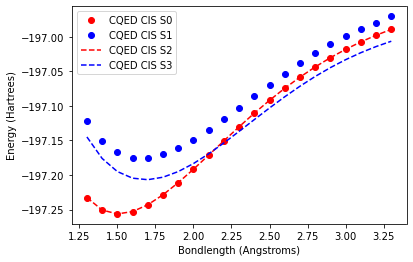

In [9]:
from matplotlib import pyplot as plt
# photon frequency in atomic units

#plt.plot(r_array, gs_energy_array+om, 'r-o', label="CIS gs")
#plt.plot(r_array, es_energy_array, 'b-*', label="CIS es")
plt.plot(r_array, cqed_cis_energy_array[0,:], 'ro', label="CQED CIS S0")
plt.plot(r_array, cqed_cis_energy_array[1,:], 'bo', label="CQED CIS S1")
plt.plot(r_array, cis_energy_array[0,:]+om, 'r--', label="CQED CIS S2")
plt.plot(r_array, cis_energy_array[1,:], 'b--', label="CQED CIS S3")
#plt.plot(r_array, cqed_cis_energy_array[4,:], 'mo', label="CQED CIS S4")

plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Energy (Hartrees)")
plt.legend()
plt.show()

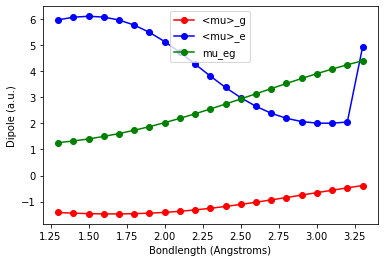

In [5]:
from matplotlib import pyplot as plt
plt.plot(r_array, dipole_array[2,0,:], 'r-o', label="<mu>_g")
plt.plot(r_array, dipole_array[2,1,:], 'b-o', label="<mu>_e")
plt.plot(r_array, np.abs(tdm_array[2,:]), 'g-o', label="mu_eg")
plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Dipole (a.u.)")
plt.legend()
plt.show()


#### Model system
We will consider the diatomic cation MgH+ in a cavity chosen such that it can trap a photon with a 
frequency of $\hbar \omega = 4.3$ eV. 
We will compute the singlet ground state and first singlet excited state potential energy surfaces along the
Mg-H+ stretch coordinate using time-dependent density functional theory.  We denote the ground 
state ket as $|g\rangle$ with an associated energy eigenvalue $E_g(R)$, and the excited-state $|e\rangle$
with associated energy eigenvalue $E_e(R)$ where $R$ is the bondlength.  The transition dipole
moment between $|g\rangle$ and $|e\rangle$ will also be computed using CIS, yielding $\mu_{ge}(R)$.
Both the ground and excited states have total dipole moments associated with them, $\langle \mu \rangle_g$ and
$\langle \mu \rangle_e$, respectively.

We will consider two quantum states for the photon - no photon in the cavity, denoted by $|0\rangle$ with associated energy eigenvalue $0$
and one photon in the cavity, denoted by $|1\rangle$ with associated energy eigenvalue $\frac{ \hbar \omega}{2}$.  
We will model this system with a Pauli-Fierz Hamiltonian that can be written as:

$$ \hat{H}_{PF} = E_g(R) \hat{a}_g^{\dagger} \hat{a}_g + E_e(R) \hat{a}_e^{\dagger} \hat{a}_e + 
\hbar \omega\hat{b} \hat{b}^{\dagger}  
+ \frac{1}{2} \left( \lambda \cdot \mu(R) \right)^2
- \sqrt{\frac{\omega}{2}} \left( \lambda \cdot \mu(R) \right) \left(\hat{b}^{\dagger} + \hat{b}\right)
$$
The polaritonic potential energy surfaces may be obtained by building a Hamiltonian matrix in the following basis and diagonalizing as a function of the bond length $R$: $ |\phi\rangle \in \{|g,0\rangle , |g,1\rangle , |e,0\rangle. $


This matrix as a function of the bond-length $R$ is as follows:
\begin{equation}
{\bf H}(R)
  \mbox{=} 
  \begin{array}{c|cccc}
       & |g,0\rangle & |g,1\rangle & |e,0\rangle \\
    \hline
    \langle g,0| & E_g(R) + (\lambda \cdot \langle \mu \rangle_g)^2  &     0   & 0  \\
    \langle g,1| & 0        &   E_g(R) +  \hbar \omega + \frac{1}{2}(\lambda \cdot \langle \mu \rangle_g)^2  & \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{ge} \\
    \langle e,0| & 0        &    \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{ge} & E_e(R) + \frac{1}{2}(\lambda \cdot \langle \mu \rangle_e)^2\\
  \end{array}
\end{equation}

In [10]:
from numpy import linalg as LA
from scipy.interpolate import InterpolatedUnivariateSpline

cis_s0_spline = InterpolatedUnivariateSpline(r_array, cis_energy_array[0,:], k=3)
cis_s1_spline = InterpolatedUnivariateSpline(r_array, cis_energy_array[1,:], k=3)

tdm_spline = InterpolatedUnivariateSpline(r_array, np.abs(tdm_array[2,:]), k=3 )

mu_g_spline = InterpolatedUnivariateSpline(r_array, dipole_array[2,0,:])
mu_e_spline = InterpolatedUnivariateSpline(r_array, dipole_array[2,1,:])



# conversion from atomic units of field strength 
# to GV / m as is used in the Figure 3 of 
# J. Chem. Phys. 153 234304 (2020)
Efield_SI_to_au = 5.14220674763e-11

# Medium electric field strength from paper JCP paper in SI units
E_field_medium = 3e12

# electric field in atomic units
#E_au = E_field_medium * Efield_SI_to_au


Htot = np.zeros((3,3))

''' Polaritonic Hamiltonian will have the following structure

    | E_g(r)+0.5*(l.<mu>_g)^2                   0                                         0              |
    | 0                           E_g(r) + h*om + 0.5*(l.<mu>_g)^2               E_au*mu_eg          |
    | 0                                     E_au*mu_eg                      E_e(r) + 0.5*(l.<mu>_e)^2    |
    
'''

pl_1 = np.zeros_like(r_array)
pl_2 = np.zeros_like(r_array)
pl_3 = np.zeros_like(r_array)
for i in range(0,len(r_array)):
    # H_00 is just E_g
    Htot[0,0] = cis_s0_spline(r_array[i]) + 0.5 * (l * mu_g_spline(r_array[i]))**2
    Htot[1,1] = cis_s0_spline(r_array[i]) + om + 0.5 * (l * mu_g_spline(r_array[i]))**2
    Htot[1,2] = E_au * tdm_spline(r_array[i])
    Htot[2,1] = E_au * tdm_spline(r_array[i])
    Htot[2,2] = cis_s1_spline(r_array[i]) + 0.5 * (l * mu_e_spline(r_array[i]))**2


    vals, vecs = LA.eig(Htot)
    idx = vals.argsort()[::1]
    vals = vals[idx]
    pl_1[i] = np.real(vals[0])
    pl_2[i] = np.real(vals[1])
    pl_3[i] = np.real(vals[2])





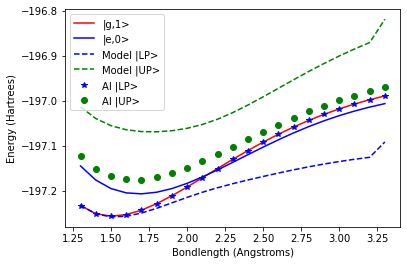

In [11]:
plt.plot(r_array, cis_s0_spline(r_array)+om, 'red', label='|g,1>')
plt.plot(r_array, cis_s1_spline(r_array), 'blue', label='|e,0>')
plt.plot(r_array, pl_2, 'b--', label="Model |LP>")
plt.plot(r_array, pl_3, 'g--', label="Model |UP>")
plt.plot(r_array, cqed_cis_energy_array[0,:], 'b*', label="AI |LP>")
plt.plot(r_array, cqed_cis_energy_array[1,:], 'go', label="AI |UP>")

#plt.plot(r_array, gs_energy_array+om/2, 'r-o', label="gs")
#plt.plot(r_array, es_energy_array, 'b-*', label="es")
plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Energy (Hartrees)")
plt.legend()
plt.show()